<a href="https://colab.research.google.com/github/ajaysriram-25/AIML/blob/main/Coursera_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

def answer_one():
    # Load the dataset
    df = pd.read_csv('./assets/fraud_data.csv')

    # Calculate the proportion of fraud cases
    fraud_cases = df.loc[df['Class'] == 1].shape[0] / df.shape[0]

    return fraud_cases

# Call the function
print(answer_one())

FileNotFoundError: [Errno 2] No such file or directory: './assets/fraud_data.csv'

In [2]:
import pandas as pd

def answer_one():
    # Load the dataset using the full path
    df = pd.read_csv('/home/user/data/fraud_data.csv')

    # Calculate the proportion of fraud cases
    fraud_cases = df.loc[df['Class'] == 1].shape[0] / df.shape[0]

    return fraud_cases

# Call the function
print(answer_one())

FileNotFoundError: [Errno 2] No such file or directory: '/home/user/data/fraud_data.csv'

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

FileNotFoundError: [Errno 2] No such file or directory: 'assets/fraud_data.csv'

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    dummy_maj = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    predicted = dummy_maj.predict(X_test)

    return (dummy_maj.score(X_test,y_test), recall_score(y_test, predicted))
# answer_two()

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    predicted = svm.predict(X_test)

    return (svm.score(X_test, y_test),recall_score(y_test, predicted),precision_score(y_test, predicted))
# answer_three()

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(gamma=1e-07,C=1e9).fit(X_train, y_train)
    prediction = svm.decision_function(X_test) > -220

    return confusion_matrix(y_test, prediction)
# answer_four()

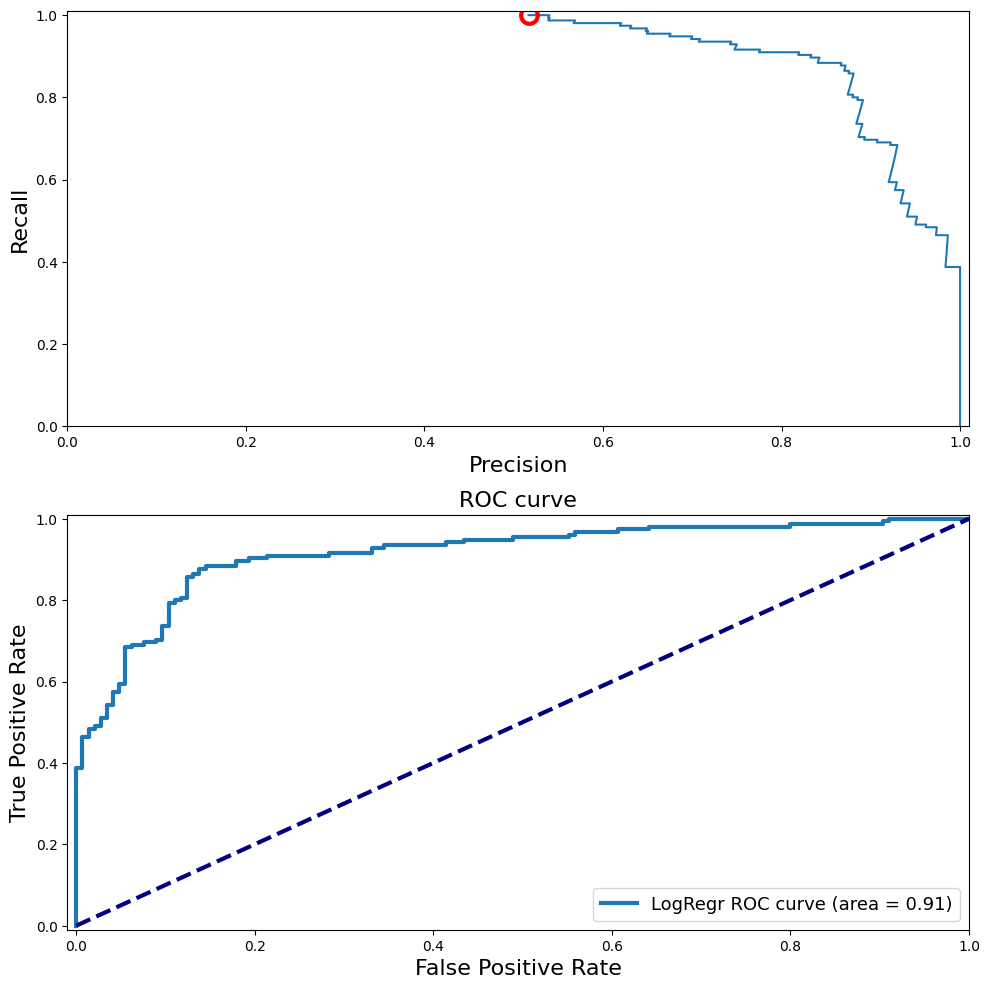

(0.9290322580645162, 0.8774193548387097)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def answer_five():
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Precision-recall curve
    y_scores_prc = lr.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_prc[:, 1])
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    # ROC curve
    y_score_roc = lr.predict_proba(X_test)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_roc[:, 1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)

    plt.subplot(2, 1, 2)
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    plt.tight_layout()
    plt.show()

    # Lookups
    recall_looking = recall[np.argmin(np.abs(precision - 0.75))]
    fpr_looking = fpr_lr[np.argmin(np.abs(fpr_lr - 0.16))]
    TP_looking = tpr_lr[np.argmin(np.abs(fpr_lr - fpr_looking))]

    return (recall_looking, TP_looking)

# Call the function
print(answer_five())


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def answer_six():
    lr = LogisticRegression(solver='liblinear')
    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}

    # Perform Grid Search
    grid_lr = GridSearchCV(lr, param_grid=grid_values, scoring="recall")
    grid_lr.fit(X_train, y_train)

    # Reshape mean test scores
    mean_cv = grid_lr.cv_results_['mean_test_score']
    mean_cv = mean_cv.reshape(4, 2)

    return mean_cv

# Call the function
print(answer_six())

[[0.         0.88571429]
 [0.94285714 0.94285714]
 [0.97142857 0.97142857]
 [0.97142857 0.97142857]]


In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())